In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [3]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [4]:
pth = '/data1/vchua/may16-lpot-hf/lpot/examples/pytorch/huggingface_models/examples/text-classification/lpot-bert-base-uncased-finetuned-mrpc_run/history.snapshot.csv'

In [5]:
df = pd.read_csv(pth)

<AxesSubplot:xlabel='episode'>

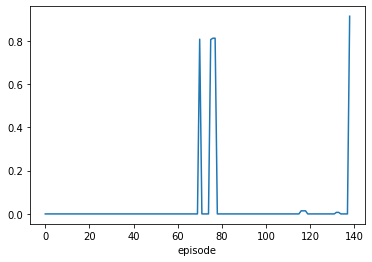

In [6]:
df.groupby('episode').mean()['tune_res0'].plot()

<AxesSubplot:xlabel='episode'>

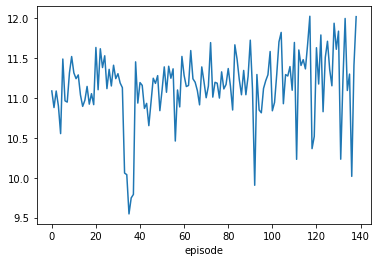

In [7]:
df.groupby('episode').mean()['tune_res1'].plot()

In [8]:
from collections import OrderedDict
import itertools as it
import numpy as np

In [9]:
col_groups = [['w_dtype', 'w_scheme', 'w_granularity', 'w_algorithm'], ['a_dtype', 'a_scheme', 'a_granularity', 'a_algorithm']]

combi_group = OrderedDict()
for i, col_grp in enumerate(col_groups):
    combi_group[i] = OrderedDict()
    
    for col in col_grp:
        combi_group[i][col] = list(df.groupby(col).groups.keys())

In [10]:
def get_bw_distribution(df):
    count=OrderedDict()

    w_combinations = it.product(*(combi_group[0][col] for col in combi_group[0]))
    a_combinations = it.product(*(combi_group[1][col] for col in combi_group[1]))

    for w_combi in list(w_combinations):
        bool_flag = [True] * len(df)
        for col, val in zip(list(combi_group[0].keys()), w_combi):
#             print(col,"==", val)
            bool_flag = bool_flag & (df[col]==val)
        count['W '+str(w_combi)] = sum(bool_flag)
    
    for a_combi in list(a_combinations):
        bool_flag = [True] * len(df)
        for col, val in zip(list(combi_group[1].keys()), a_combi):
#             print(col,"==", val)
            bool_flag = bool_flag & (df[col]==val)
        count['A '+str(a_combi)] = sum(bool_flag)

#     return pd.DataFrame.from_dict(count)
    return pd.DataFrame(count, index=[0])

In [11]:
quantizer_dist = df.groupby(['episode']).apply(get_bw_distribution)

In [13]:
quantizer_dist.reset_index()[['episode']+list(quantizer_dist.columns)]

,episode,"W ('fp32', 'sym', 'per_channel', 'minmax')","W ('int8', 'sym', 'per_channel', 'minmax')","A ('fp32', 'asym', 'per_tensor', 'minmax')","A ('uint8', 'asym', 'per_tensor', 'minmax')"
0,0,0,74,0,74
1,1,0,73,0,73
2,2,0,73,0,73
3,3,0,73,0,73
4,4,0,73,0,73
5,5,0,73,0,73
6,6,0,73,0,73
7,7,0,73,0,73
8,8,0,73,0,73
9,9,0,73,0,73
